In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee/train.csv
/kaggle/input/employee/test.csv


# Introduction

Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition. Let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this IBM dataset.

* This intoduction from ROHIT SAHOO notebook

**Inspiration**

Predict the Attrition of an employee based on the various factor given

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading & Inspecting Data

In [3]:
train_data = pd.read_csv(r"/kaggle/input/employee/train.csv")
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
test_data = pd.read_csv(r"/kaggle/input/employee/test.csv")
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2


In [5]:
train_data['train_test'] = 1
test_data['train_test'] = 0

#  Data understanding

In [6]:
print(f"The given dataset contains {train_data.shape[0]} rows and {train_data.shape[1]} columns")

The given dataset contains 1058 rows and 36 columns


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [8]:
train_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,train_test
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000,1058.0
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722,1.0
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044,0.0
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.0
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000,1.0
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000,1.0
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000,1.0
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000,1.0


# Exploratory Data Analysis

### Predict the Attrition of an employee based on the various factor given

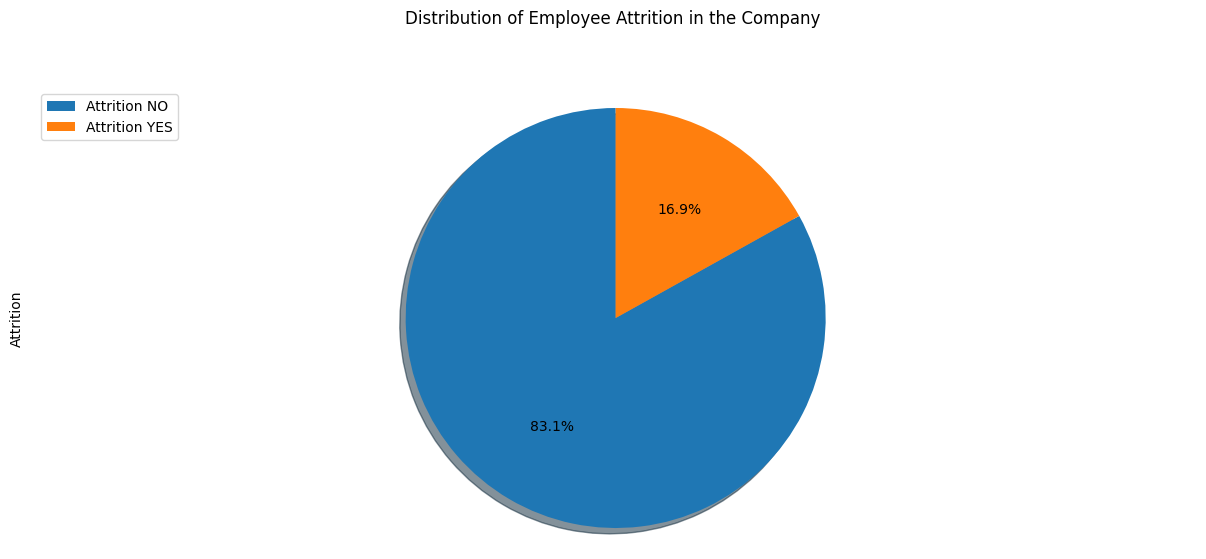

In [9]:
labels = 'Attrition NO','Attrition YES'
train_data['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

From the Pie Chart, we can infer that 16.9% of the employees left their job due to some reasons whereas other 83.1% of the employees preferred to continue their job at the company

## Analysis of the Rating Features
* JobSatisfaction
* EnvironmentSatisfaction
* RelationshipSatisfaction
* JobInvolvement
* WorkLifeBalance
* PerformanceRating

In [10]:
train_data['JobSatisfaction'].value_counts()

4    340
3    318
1    205
2    195
Name: JobSatisfaction, dtype: int64

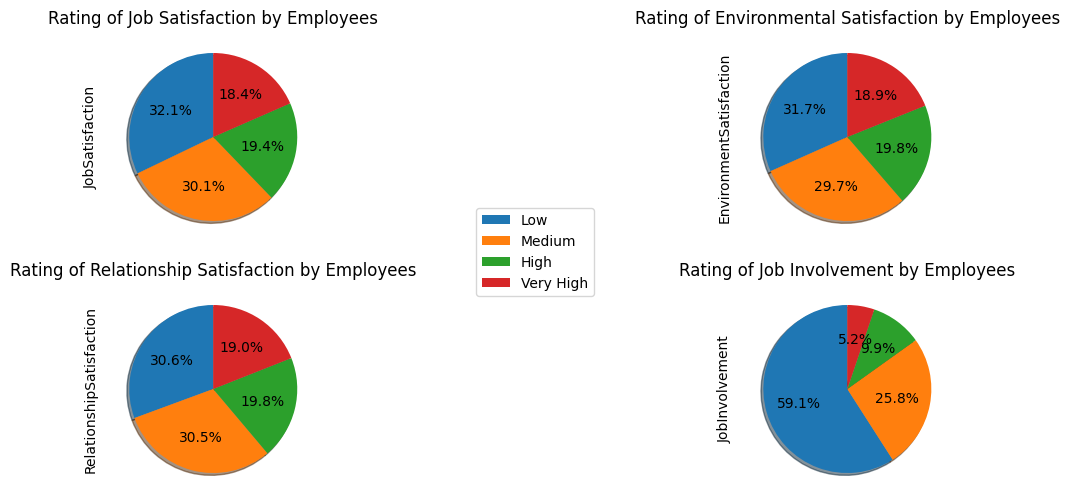

In [11]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

train_data['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

train_data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

train_data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

train_data['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

From the subplot, we can infer that more than 60% of the employees are :

* Not Satisfied in their Job
* Not Satisfied with their Work Environmnet
* Not Satisfied in their Relationship
* Not Getting involved in their job

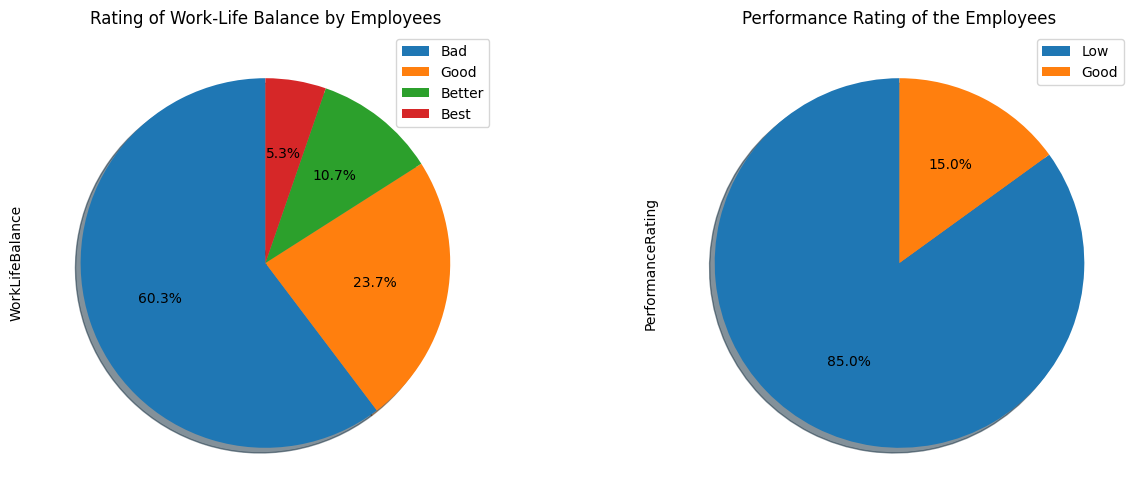

In [12]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

train_data['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

train_data['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

From the above piecharts, we can see that:

* Almost 60% of the employees have rated their Work-life Balance as Bad
* Almost 85% of the employees have a low performance rating

## Analysis of Business Travel Feature

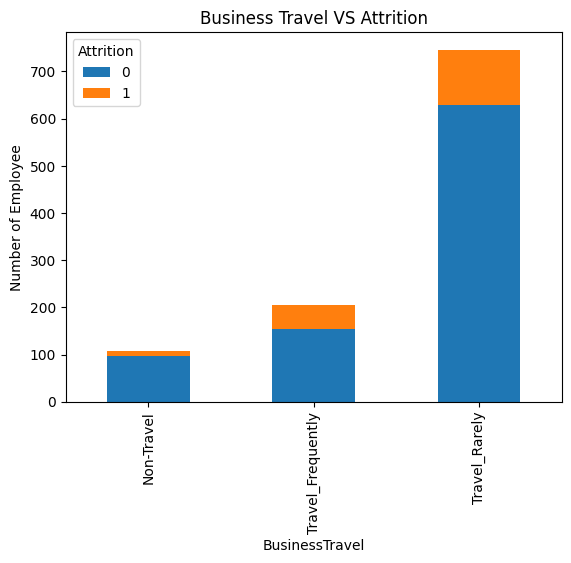

In [13]:
props = train_data.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently

* Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest

## Analysis of Work Experience
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* TotalWorkingYears

In [14]:
we = train_data[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,1
1,10,7,1,7,10,0
2,0,0,0,0,7,1
3,8,7,3,0,8,0
4,2,2,2,2,6,0


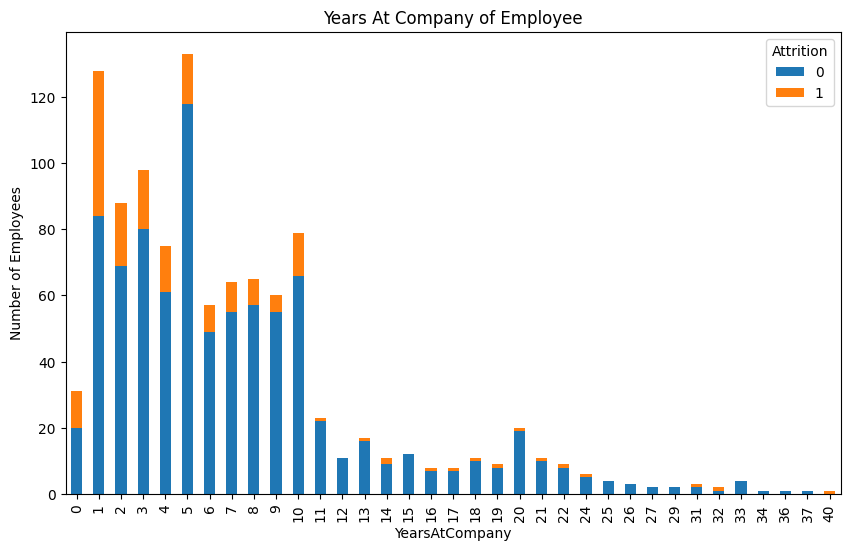

In [15]:
yac = train_data.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

**It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out**

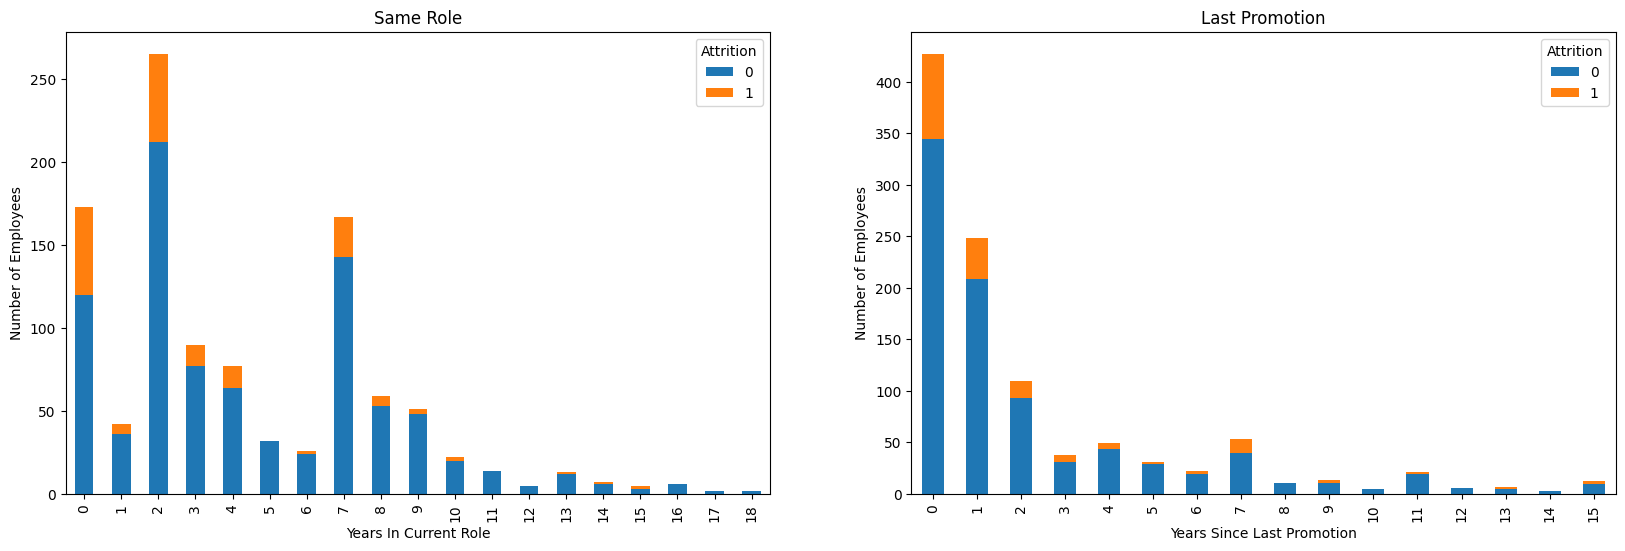

In [16]:
ycr = train_data.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = train_data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()


**From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most**

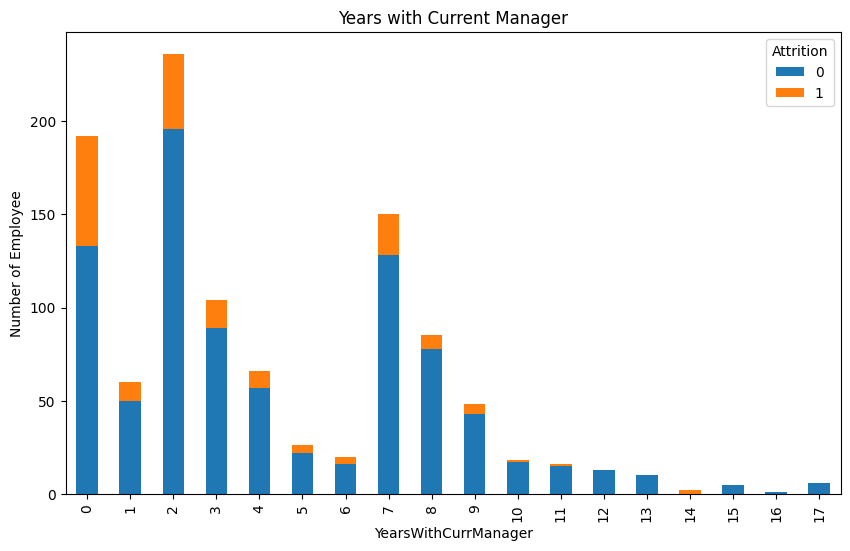

In [17]:
ycm = train_data.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

**It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition**

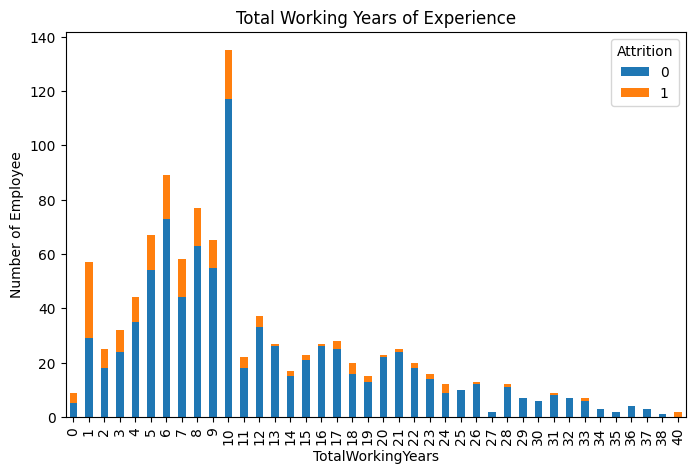

In [18]:
twy = train_data.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()


**It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start**

## Analysis on Department

In [19]:
dpt = train_data[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,1
1,Research & Development,0
2,Research & Development,1
3,Research & Development,0
4,Research & Development,0


In [20]:
dpt['Department'].value_counts()

Research & Development    701
Sales                     319
Human Resources            38
Name: Department, dtype: int64

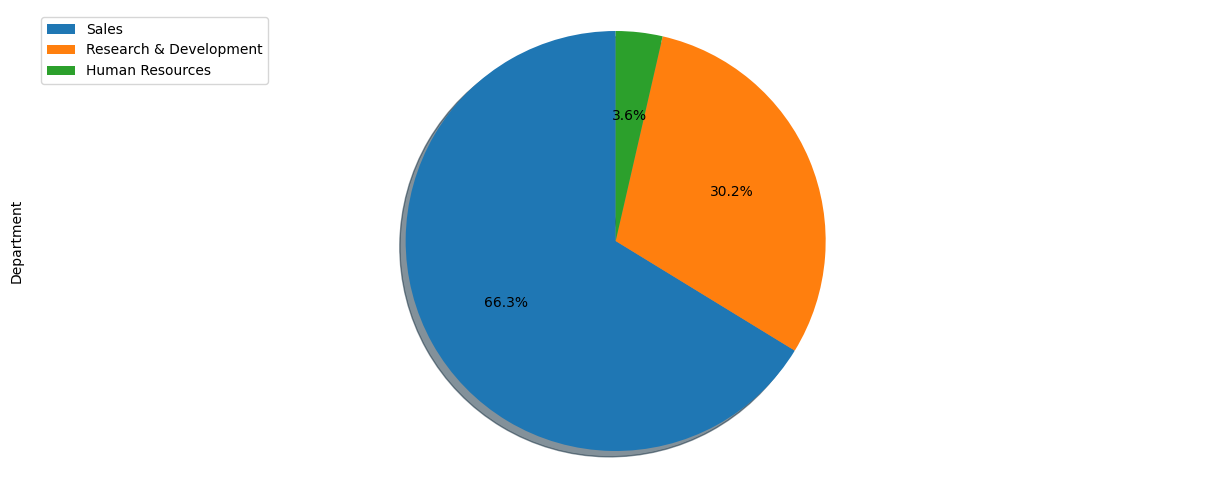

In [21]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=dpt['Department'].unique(), loc='upper left') 

In [22]:
dpm = train_data.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,32,594,253
1,6,107,66


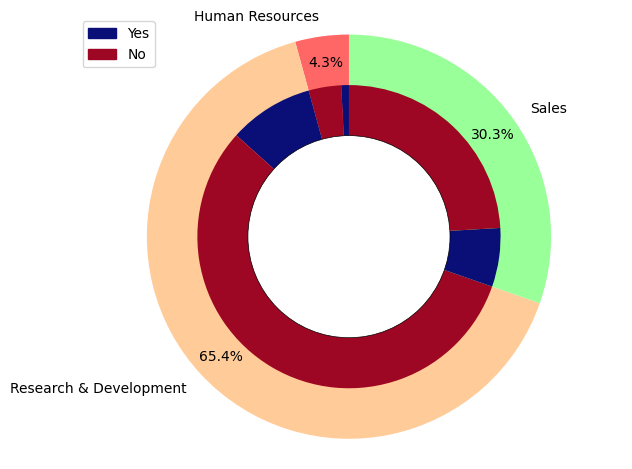

In [23]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()


## Analysis Gender

In [24]:
gda = train_data[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,1
1,Male,8,0
2,Male,2,1
3,Female,3,0
4,Male,2,0


In [25]:
gda['Gender'].value_counts()

Male      620
Female    438
Name: Gender, dtype: int64

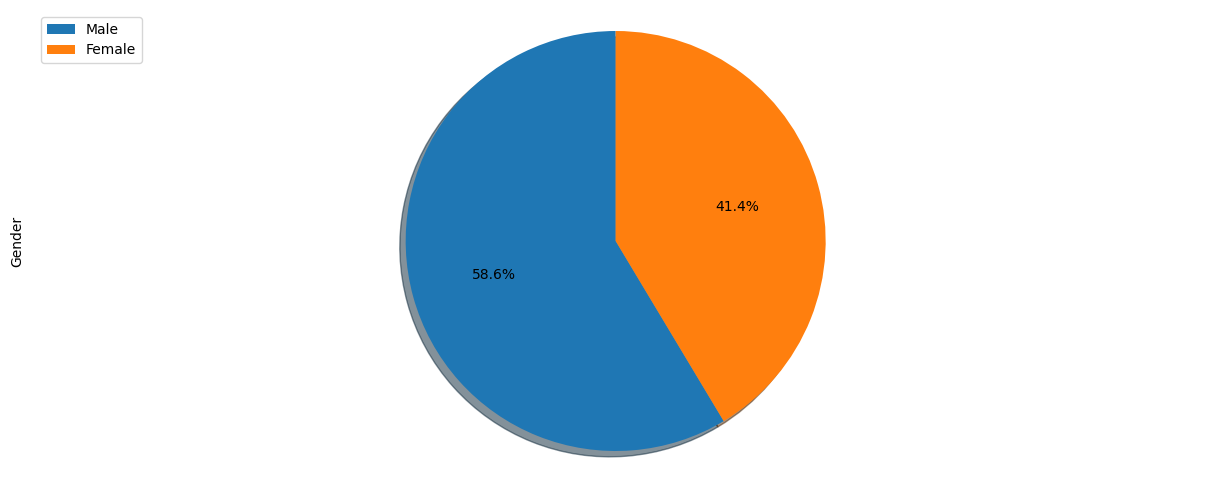

In [26]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left') 

In [27]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
0,367,512
1,71,108


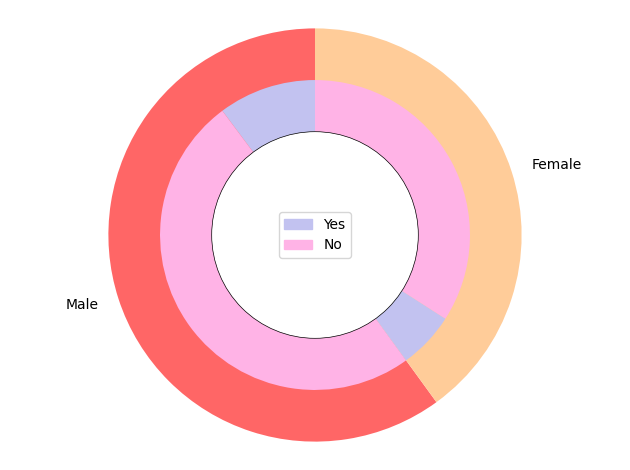

In [28]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()


## Analysis of Marital Status

In [29]:
ms = train_data[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,1
1,Married,0
2,Single,1
3,Married,0
4,Married,0


In [30]:
ms['MaritalStatus'].value_counts()

Married     464
Single      352
Divorced    242
Name: MaritalStatus, dtype: int64

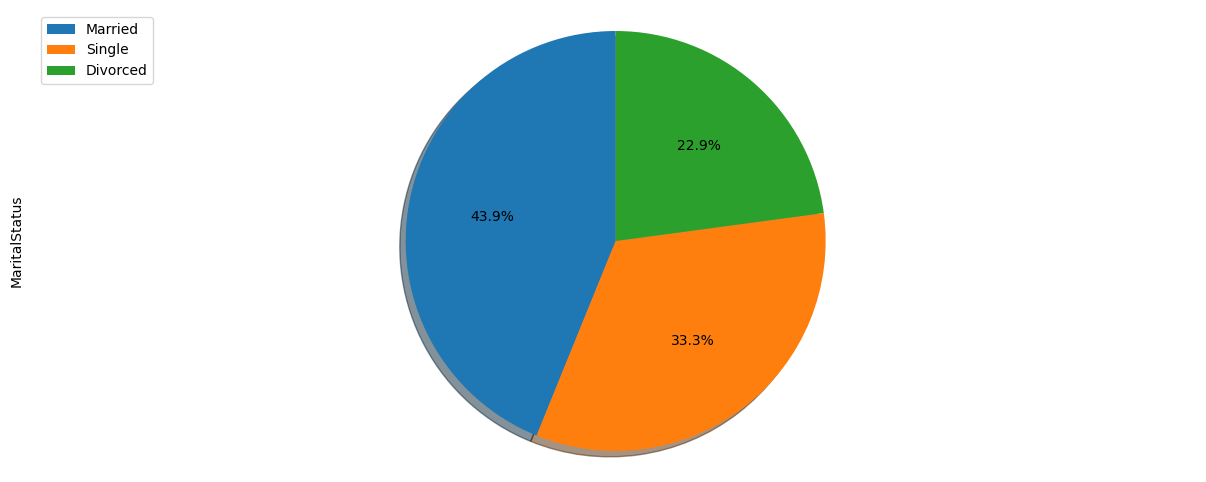

In [31]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left') 

In [32]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,219,402,258
1,23,62,94


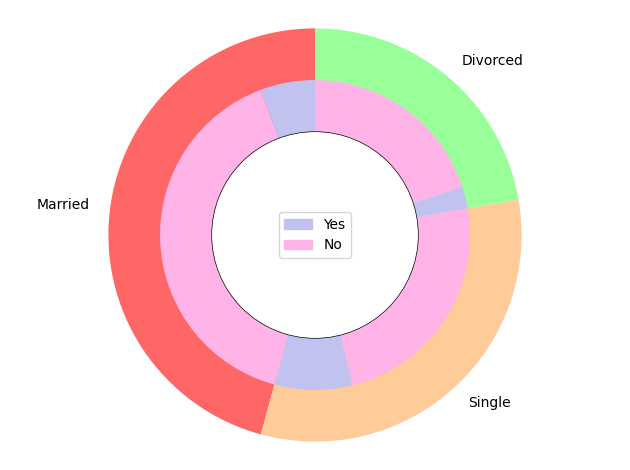

In [33]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()


# Data preprocessing

### Combine train and test dataframes in one dataframe

In [34]:
data = pd.concat([train_data, test_data], axis = 0)
data = data.reset_index()

In [35]:
data.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,train_test
0,0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80,0,8,0,1,6,4,0,5,1
1,1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80,1,10,3,3,10,7,1,7,1
2,2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80,0,7,3,3,0,0,0,0,1
3,3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80,0,8,3,3,8,7,3,0,1
4,4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,1


## Duplicated rows

In [36]:
data.duplicated().sum()

0

## Null values

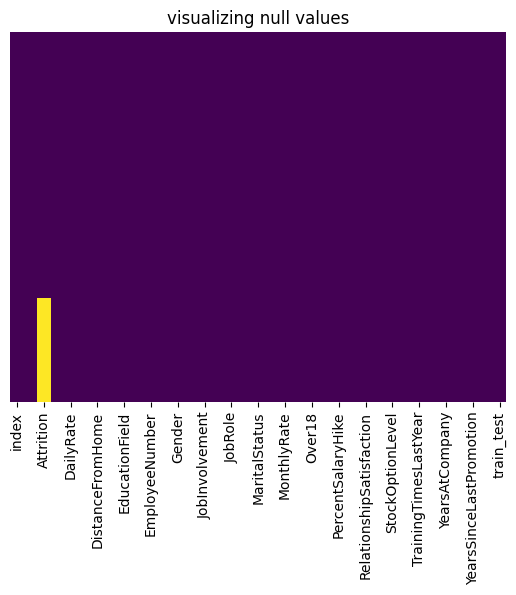

In [37]:
ax = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# Display the plot
plt.title("visualizing null values")
plt.show()

In [38]:
data.isnull().sum()

index                         0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLife

In [39]:
round(data.isna().mean() * 100, 2)

index                        0.00
Age                          0.00
Attrition                   28.03
BusinessTravel               0.00
DailyRate                    0.00
Department                   0.00
DistanceFromHome             0.00
Education                    0.00
EducationField               0.00
EmployeeCount                0.00
EmployeeNumber               0.00
EnvironmentSatisfaction      0.00
Gender                       0.00
HourlyRate                   0.00
JobInvolvement               0.00
JobLevel                     0.00
JobRole                      0.00
JobSatisfaction              0.00
MaritalStatus                0.00
MonthlyIncome                0.00
MonthlyRate                  0.00
NumCompaniesWorked           0.00
Over18                       0.00
OverTime                     0.00
PercentSalaryHike            0.00
PerformanceRating            0.00
RelationshipSatisfaction     0.00
StandardHours                0.00
StockOptionLevel             0.00
TotalWorkingYe

# Handling null values

* Missing values in Attrition column is 28.03%, so we can impute missing values using mode.

In [40]:
# Calculate the mode of the 'Attrition' column
mode_value = data['Attrition'].mode()[0]

# Replace missing values with the mode
data['Attrition'].fillna(mode_value, inplace=True)

## Drop columns

**Removing Useless Features**

1. StandardHours
1. EmployeeCount
1. Over18
1. StockOptionLevel

In [41]:
# Drop useless features - StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
data.drop(columns=['StandardHours','EmployeeCount','Over18','StockOptionLevel'],inplace=True)
data.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,train_test
0,0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,8,0,1,6,4,0,5,1
1,1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,10,3,3,10,7,1,7,1
2,2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,7,3,3,0,0,0,0,1
3,3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,8,3,3,8,7,3,0,1
4,4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,6,3,3,2,2,2,2,1


In [42]:
data.shape

(1470, 33)

## Convert the categorical features to numerical

### dividing data into features and labels


In [43]:
features = data.drop(["Attrition"], axis = 1)
labels = data.filter(["Attrition","train_test"], axis = 1)
features.head()

,index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,train_test
0,0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,8,0,1,6,4,0,5,1
1,1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,10,3,3,10,7,1,7,1
2,2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,7,3,3,0,0,0,0,1
3,3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,8,3,3,8,7,3,0,1
4,4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,6,3,3,2,2,2,2,1


### Extract categorical features

In [44]:
categorical = features.select_dtypes(include = "object")
categorical.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [45]:
len(categorical.columns)

7

### Extract numerical features

In [46]:
numerical = features.select_dtypes(include = ["float", "int64"])
numerical.columns

Index(['index', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'train_test'],
      dtype='object')

In [47]:
len(numerical.columns)

25

### Convert categorical features to numerical

In [48]:
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


### Concat categorical and numerical features

In [49]:
features = pd.concat([numerical, cat_numerical], axis = 1)
features.head()

,index,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,41,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,1,49,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,2,37,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,3,33,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,4,27,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [50]:
labels.head()

,Attrition,train_test
0,1.0,1
1,0.0,1
2,1.0,1
3,0.0,1
4,0.0,1


### Standarize and normalize the data

First we should split the data into train and test datasets then we standarize and normalize it.

#### Splitting the data into Training, and Testing sets

In [51]:
X_train = features[features.train_test == 1].drop(['train_test'], axis = 1)
X_test = features[features.train_test == 0].drop(['train_test'], axis = 1)

y_train = labels[labels.train_test == 1].Attrition
y_test = labels[labels.train_test == 0].Attrition


In [52]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')

X_train shape is (1058, 45)
X_test shape is (412, 45)
y_train shape is (1058,)


#### Standarize data using StandardScalar and then Normalize it

In [53]:
# Standardize data
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)

In [54]:
X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.243185,0.058931,0.100667,-0.139512,-0.119824,-0.238157,-0.091680,0.196161,0.052424,-0.011225,...,-0.065329,-0.039922,-0.047140,-0.035063,-0.070765,0.265175,-0.033845,-0.124209,0.199029,0.219804
1,-0.249965,0.183783,-0.188065,-0.017617,-0.263781,-0.244926,0.038066,-0.033082,-0.151476,-0.011560,...,-0.067278,-0.041113,-0.048546,-0.036109,0.287420,-0.076702,-0.034855,0.163752,-0.102193,-0.092534
2,-0.229044,-0.000788,0.183364,-0.115366,-0.113285,-0.224236,0.156570,0.172376,-0.139061,-0.127575,...,0.285822,-0.037743,-0.044567,-0.033150,-0.066904,-0.070416,-0.031998,-0.117431,0.188168,0.207810
3,-0.275287,-0.068989,0.228249,-0.119014,0.173967,-0.269651,0.188539,-0.075950,0.059683,-0.153624,...,-0.074375,-0.045450,-0.053667,-0.039918,0.317740,-0.084793,-0.038532,0.181026,-0.112974,0.250241
4,-0.267840,-0.166739,-0.083483,-0.135422,-0.284260,-0.262133,-0.244511,-0.196872,0.058179,-0.149753,...,0.335510,-0.044304,-0.052315,-0.038913,-0.078535,-0.082657,-0.037561,0.176465,-0.110127,-0.099718


In [55]:
X_test = pd.DataFrame(X_test)
X_test = X_test.reset_index(drop=True)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.217037,-0.040747,-0.006003,0.234433,0.136377,0.220256,-0.196633,-0.158322,-0.131273,-0.010018,...,-0.058304,-0.035629,-0.042071,-0.031293,-0.063157,0.236662,-0.030206,-0.110853,0.177629,0.196170
1,-0.241911,-0.030612,-0.051302,-0.034477,-0.255282,0.246939,0.165052,0.071402,0.052248,-0.134487,...,-0.065110,-0.039788,-0.046982,-0.034946,-0.070528,-0.074231,0.581587,0.158476,-0.098900,-0.089553
2,-0.255014,-0.205333,-0.155271,0.000400,0.017360,0.261495,-0.096505,0.170076,0.055183,-0.142040,...,0.318230,-0.042023,-0.049621,-0.036909,-0.074490,-0.078400,-0.035627,-0.130745,0.209504,0.231372
3,-0.237484,-0.191582,0.006916,0.069070,-0.117683,0.244303,0.162648,0.083951,0.051487,-0.132528,...,-0.064162,-0.039208,-0.046298,-0.034437,-0.069501,-0.073149,0.573116,0.156168,-0.097460,-0.088248
4,-0.251027,0.107917,0.137285,-0.126921,-0.266416,0.259065,-0.095358,0.146469,0.054527,0.117001,...,-0.067950,-0.041523,0.435780,-0.036470,-0.073605,-0.077468,-0.035203,-0.129192,0.207014,0.228623


# Model Training

#### Using SVM model for predicting

In [56]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Prepare your data
# Assuming you have your input features in X and corresponding labels in y

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Train the SVM model
svm_model = svm.SVC(kernel='linear', C=1.0)  # Use a linear kernel and set C parameter
svm_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8537735849056604
Precision: 0.8571428571428571
Recall: 0.16666666666666666
F1 Score: 0.27906976744186046


## Test Submission

In [57]:
y_pred = svm_model.predict(X_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
submission = pd.DataFrame({'Attrition': y_pred})

In [59]:
submission.head()

,Attrition
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [60]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Attrition  212 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [61]:
submission['Attrition'] = y_pred
submission['Attrition'] = submission['Attrition'].astype('int')

In [62]:
submission.head()

,Attrition
0,1
1,0
2,0
3,0
4,0


In [63]:
submission.to_csv('submission.csv', index=False)